In [59]:
# Import libraries 
import pandas as pd
import numpy as np
import json
import os

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px
import geopandas as gpd
import geoplot as gplt 
import geoplot.crs as gcrs
import warnings
import zipfile
from sklearn.utils import resample

current_wd=os.getcwd()


In [68]:
df= pd.read_csv("C:/Users/Murad Aladdinzada/Downloads/processed_us_car_accidents_2022/processed_us_car_accidents_2022.csv")

df.head(10).to_clipboard()

PermissionError: [Errno 13] Permission denied

<Figure size 1500x600 with 0 Axes>

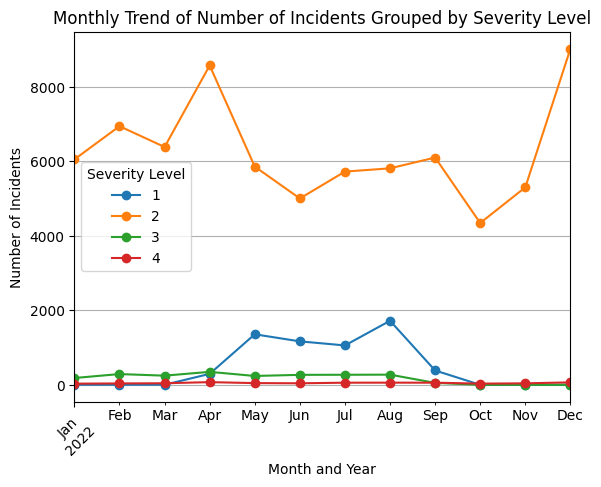

In [80]:
# Extracting month and year from the Start_Time for grouping
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Month_Year'] = df['Start_Time'].dt.to_period('M')

# Grouping data by month and year, and then by severity, and counting incidents
monthly_incidents_severity = df.groupby(['Month_Year', 'Severity']).size().unstack(fill_value=0)

# Plotting
plt.figure(figsize=(15, 6))
monthly_incidents_severity.plot(kind='line', marker='o')

# Formatting the plot
plt.title('Monthly Trend of Number of Incidents Grouped by Severity Level')
plt.xlabel('Month and Year')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.legend(title='Severity Level')
plt.grid(True)

# Show the plot
plt.show()

In [79]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lattitude,Start_Longitude,End_Lattitude,End_Longitude,Distance(mi),...,Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Traffic_Signal,Sunrise_Sunset,State_Abbrv,Population
0,A-512238,Source2,1,2022-09-08 06:10:34,2022-09-08 06:40:17,33.771770,-79.719116,33.771770,-79.719116,0.0,...,29.75,10.0,CALM,0.0,0.0,Cloudy,False,Night,SC,5282634
1,A-512239,Source2,1,2022-09-08 06:10:07,2022-09-08 06:39:51,33.863682,-81.238472,33.863682,-81.238472,0.0,...,29.57,10.0,CALM,0.0,0.0,Fair,False,Night,SC,5282634
2,A-512240,Source2,1,2022-09-08 06:30:03,2022-09-08 07:29:44,34.133850,-80.744522,34.133850,-80.744522,0.0,...,29.52,10.0,NNE,8.0,0.0,Mostly Cloudy,False,Night,SC,5282634
3,A-512268,Source2,1,2022-09-08 05:52:24,2022-09-08 06:22:11,33.801682,-79.143051,33.801682,-79.143051,0.0,...,29.77,10.0,CALM,0.0,0.0,Cloudy,False,Night,SC,5282634
4,A-512269,Source2,1,2022-09-08 06:24:54,2022-09-08 06:54:40,34.025124,-78.798973,34.025124,-78.798973,0.0,...,29.72,10.0,NNE,3.0,0.0,Partly Cloudy,False,Night,SC,5282634


In [61]:
df= df[df["State_Abbrv"] == "SC"].reset_index(drop=True).drop(columns=['Unnamed: 0'])

In [62]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lattitude,Start_Longitude,End_Lattitude,End_Longitude,Distance(mi),...,Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Traffic_Signal,Sunrise_Sunset,State_Abbrv,Population
0,A-512238,Source2,1,2022-09-08 06:10:34,2022-09-08 06:40:17,33.771770,-79.719116,33.771770,-79.719116,0.0,...,29.75,10.0,CALM,0.0,0.0,Cloudy,False,Night,SC,5282634
1,A-512239,Source2,1,2022-09-08 06:10:07,2022-09-08 06:39:51,33.863682,-81.238472,33.863682,-81.238472,0.0,...,29.57,10.0,CALM,0.0,0.0,Fair,False,Night,SC,5282634
2,A-512240,Source2,1,2022-09-08 06:30:03,2022-09-08 07:29:44,34.133850,-80.744522,34.133850,-80.744522,0.0,...,29.52,10.0,NNE,8.0,0.0,Mostly Cloudy,False,Night,SC,5282634
3,A-512268,Source2,1,2022-09-08 05:52:24,2022-09-08 06:22:11,33.801682,-79.143051,33.801682,-79.143051,0.0,...,29.77,10.0,CALM,0.0,0.0,Cloudy,False,Night,SC,5282634
4,A-512269,Source2,1,2022-09-08 06:24:54,2022-09-08 06:54:40,34.025124,-78.798973,34.025124,-78.798973,0.0,...,29.72,10.0,NNE,3.0,0.0,Partly Cloudy,False,Night,SC,5282634


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83882 entries, 0 to 83881
Data columns (total 32 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 83882 non-null  object 
 1   Source             83882 non-null  object 
 2   Severity           83882 non-null  int64  
 3   Start_Time         83882 non-null  object 
 4   End_Time           83882 non-null  object 
 5   Start_Lattitude    83882 non-null  float64
 6   Start_Longitude    83882 non-null  float64
 7   End_Lattitude      83882 non-null  float64
 8   End_Longitude      83882 non-null  float64
 9   Distance(mi)       83882 non-null  float64
 10  Description        83882 non-null  object 
 11  Street             83882 non-null  object 
 12  City               83882 non-null  object 
 13  County             83882 non-null  object 
 14  State              83882 non-null  object 
 15  Zipcode            83882 non-null  object 
 16  Country            838

In [64]:
df['Severity'].value_counts()

Severity
2    75149
1     5987
3     2167
4      579
Name: count, dtype: int64

We observed that there were only 579 instances of severity level 4 in our dataset, which presented a significant challenge in training our model effectively. Initially, we attempted to address this by sampling 500 instances from each severity level, including severity level 4. However, this approach did not yield satisfactory results, as the model still struggled to accurately predict severity level 4 incidents, achieving only around 15% accuracy for this category.

To further explore this issue, we adjusted our approach by increasing the sample size for the other severity levels to 2000 each, while maintaining 500 samples for severity level 4. Despite this adjustment, the model's performance in predicting severity level 4 incidents did not improve significantly, indicating that the limited number of severity level 4 samples was insufficient for the model to learn and generalize effectively.

Given these outcomes, we decided to exclude severity level 4 from our analysis. This decision was based on several considerations:

The low occurrence of severity level 4 incidents in the dataset led to an imbalance that the model could not overcome, even with adjusted sampling strategies.
The limited data for severity level 4 did not provide enough variability and patterns for the model to learn from, resulting in poor predictive accuracy.
Focusing on the more frequent severity levels allowed us to utilize a larger, more representative sample for those categories, potentially improving the model's overall performance.
By removing the least represented severity level, we aimed to reduce the model's complexity and improve its ability to predict the more common severity levels accurately.
This approach also aligns with practical considerations, where the focus is often on predicting and understanding more frequent events that have a higher likelihood of occurrence.
In summary, the exclusion of severity level 4 from our model was a strategic decision to enhance the model's performance and reliability, given the constraints posed by the available data.

In [65]:
# Set a random seed for reproducibility
random_seed = 42

n_samples = 2000

# Separate the dataset into subsets based on severity levels
severity_1 = df[df['Severity'] == 1]
severity_2 = df[df['Severity'] == 2]
severity_3 = df[df['Severity'] == 3]
# didn't include Severity level 4
# severity_4 = df[df['Severity'] == 4]

# Resample each subset
severity_1_sampled = resample(severity_1, replace=False, n_samples=n_samples, random_state=random_seed)
severity_2_sampled = resample(severity_2, replace=False, n_samples=n_samples, random_state=random_seed)
severity_3_sampled = resample(severity_3, replace=False, n_samples=n_samples, random_state=random_seed)
# severity_4_sampled = resample(severity_4, replace=False,  n_samples=n_samples, random_state=random_seed)  


# Combine the samples into one dataframe
balanced_data = pd.concat([severity_1_sampled, severity_2_sampled, severity_3_sampled])

# Shuffle the combined dataset
balanced_data = balanced_data.sample(frac=1, random_state=random_seed).reset_index(drop=True)

balanced_data.head()



,ID,Source,Severity,Start_Time,End_Time,Start_Lattitude,Start_Longitude,End_Lattitude,End_Longitude,Distance(mi),...,Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Traffic_Signal,Sunrise_Sunset,State_Abbrv,Population
0,A-586854,Source2,1,2022-06-21 19:54:21,2022-06-21 20:41:47,34.709846,-82.500259,34.709846,-82.500259,0.000,...,29.10,10.0,NE,5.0,0.0,Fair,False,Day,SC,5282634
1,A-4484783,Source1,2,2022-05-11 16:38:04,2022-05-11 17:10:41,33.559935,-79.040815,33.570641,-79.031494,0.914,...,29.99,10.0,N,16.0,0.0,Fair,False,Day,SC,5282634
2,A-568002,Source2,1,2022-07-13 08:19:52,2022-07-13 09:19:40,33.955147,-80.926102,33.955147,-80.926102,0.000,...,29.84,10.0,WSW,6.0,0.0,Mostly Cloudy,False,Day,SC,5282634
3,A-4222938,Source1,2,2022-11-08 10:56:26,2022-11-08 12:12:16,32.963400,-80.602294,32.964596,-80.601003,0.111,...,30.21,10.0,NNE,8.0,0.0,Fair,False,Day,SC,5282634
4,A-555983,Source2,3,2022-07-25 22:47:09,2022-07-25 23:16:47,34.135208,-80.963585,34.135208,-80.963585,0.000,...,29.94,10.0,CALM,0.0,0.0,Partly Cloudy,False,Night,SC,5282634


In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import copy

# Load the dataset

# creating 
df_sample = copy.deepcopy(balanced_data)

# Data Preparation
features = ['Temperature(F)', 'Traffic_Signal', 'Distance(mi)', 'Precipitation(in)']
target = 'Severity'
df_sample['Traffic_Signal'] = df_sample['Traffic_Signal'].astype(int)  # Convert 'Traffic_Signal' to numerical

# Extracting the features and target
X = df_sample[features]
y = df_sample[target]

# Handling missing values
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
# test size was taken 30%
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=15)

# Training the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Generating the confusion matrix for individual accuracies
cm = confusion_matrix(y_test, y_pred)
individual_accuracies = cm.diagonal() / cm.sum(axis=1)
individual_accuracies_dict = {f"Severity {i+1} Accuracy": acc for i, acc in enumerate(individual_accuracies)}

# Displaying results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)
print("Individual Accuracies for Each Severity Level:", individual_accuracies_dict)


Accuracy: 0.6638888888888889
Classification Report:
               precision    recall  f1-score   support

           1       0.59      0.67      0.63       573
           2       0.87      0.78      0.82       625
           3       0.55      0.54      0.54       602

    accuracy                           0.66      1800
   macro avg       0.67      0.66      0.66      1800
weighted avg       0.67      0.66      0.67      1800

Individual Accuracies for Each Severity Level: {'Severity 1 Accuracy': 0.6684118673647469, 'Severity 2 Accuracy': 0.7792, 'Severity 3 Accuracy': 0.5398671096345515}


<Figure size 1200x800 with 0 Axes>

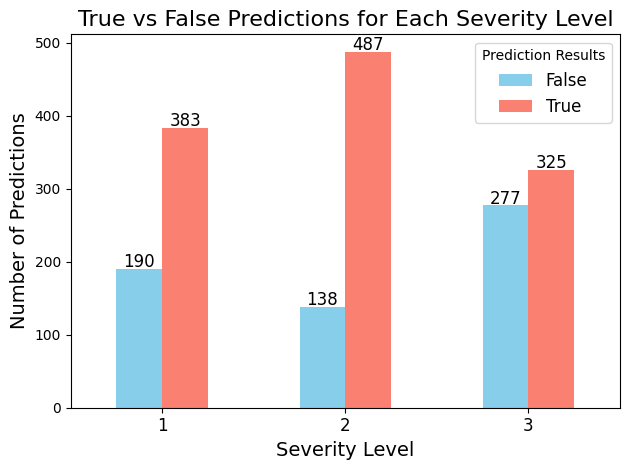

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame for the test set with actual and predicted severity
test_results_df = pd.DataFrame({'Actual_Severity': y_test, 'Predicted_Severity': y_pred})
test_results_df['Correct_Prediction'] = test_results_df['Actual_Severity'] == test_results_df['Predicted_Severity']

# Grouping by Actual Severity and whether the prediction was correct
grouped_data = test_results_df.groupby(['Actual_Severity', 'Correct_Prediction']).size().unstack(fill_value=0)


plt.figure(figsize=(12, 8))  # figure size
grouped_bar = grouped_data.plot(kind='bar', stacked=False, color=['skyblue', 'salmon'])

plt.title('True vs False Predictions for Each Severity Level', fontsize=16)  #  title font size
plt.xlabel('Severity Level', fontsize=14)  # Increased x-axis label font size
plt.ylabel('Number of Predictions', fontsize=14)  # Increased y-axis label font size
plt.xticks(rotation=0, fontsize=12)  # Increased x-axis ticks font size
plt.legend(['False', 'True'], title='Prediction Results', fontsize=12)  # Increased legend font size

# Adding annotations on each bar with reduced gap
for p in grouped_bar.patches:
    grouped_bar.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=12)  # Increased annotation font size

plt.tight_layout()

# Save plot with high resolution
plt.savefig('plot_high_res.png', dpi=600)  # Save as high-resolution PNG

# Show plot
plt.show()
